# ***Life Expectancy and Its Factors***

## ***Importing Data Into Pandas Timeframe***

In [93]:
import csv
import pandas as pd

df = pd.read_csv('Life_Expectancy_00_15.csv', sep = ';')
df = df.drop(columns=["Year", "Forest area", "GDP per capita", "Military expenditure"], axis = 1)

df

,Country,Continent,Least Developed,Life Expectancy,Population,CO2 emissions,Health expenditure,Electric power consumption,Individuals using the Internet,People practicing open defecation,People using at least basic drinking water services,Obesity among adults,Beer consumption per capita
0,Albania,Europe,False,73.955,3089027,1.026213,7.233370,1414.703784,0.114097,0.888853,86.754471,12.8,1.33431
1,Albania,Europe,False,74.288,3060173,1.055496,7.139524,1449.647413,0.325798,0.836397,86.904070,13.3,1.48995
2,Albania,Europe,False,74.579,3051010,1.232379,6.909341,1351.230796,0.390081,0.781899,87.451635,13.9,1.28697
3,Albania,Europe,False,74.828,3039616,1.338985,7.063490,1578.165919,0.971900,0.728191,87.987194,14.4,1.44830
4,Albania,Europe,False,75.039,3026939,1.404059,6.773372,1469.264539,2.420388,0.675281,88.510583,15.0,1.37617
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,Zimbabwe,Africa,False,52.896,12894323,0.884886,8.081738,606.643960,8.400000,26.876148,67.016076,10.8,2.05000
1900,Zimbabwe,Africa,False,55.032,13115149,0.915735,6.918354,636.248991,12.000000,26.533231,66.491185,11.1,2.07000
1901,Zimbabwe,Africa,False,56.897,13350378,0.919824,7.110148,608.761669,15.500000,26.188786,65.966474,11.3,2.12000
1902,Zimbabwe,Africa,False,58.410,13586710,0.889104,8.133525,628.746242,16.364740,25.832157,65.454108,11.6,2.23000


## ***Preparing The Data***

### *Converting Catagorical Data into Usable Quantitative Data*

In [94]:
least_dev = []
cont_lst = []
cont_dict = {"Africa": 0, "Europe": 1, "Oceania": 2, "North America": 3, "South America": 4, "Asia": 5}

""" Converting all true and false values into 1 and 0 respectively """
for i in df["Least Developed"]:
    
    if i == True:
        least_dev.append(1)
    
    else:
        least_dev.append(0)

df["Least Developed"] = least_dev

""" Converting all continents to an assigned integer based on the continent name """
for cont in df["Continent"]:
    if cont in cont_dict:
        cont_lst.append(cont_dict[cont])

df["Continent"] = cont_lst

### *Separating the inputs as x and outputs as y for model building*

In [95]:
x = df.drop(columns=['Life Expectancy', 'Country'], axis = 1)
y = df['Life Expectancy']

### *Data Splitting*

In [96]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)


## ***Model Building***

### *Linear Regression Model*

In [97]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

### *Applying Model to Make a Prediction*

In [98]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

### *Evaluate Model Performance*

In [99]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

print("Linear Regression MSE (Train): " , lr_train_mse)
print("Linear Regression R2 (Train): " , lr_train_r2)
print("Linear Regression MSE (Test): " , lr_test_mse)
print("Linear Regression R2 (Test): " , lr_test_r2)

Linear Regression MSE (Train):  14.745799403215294
Linear Regression R2 (Train):  0.8033392451855654
Linear Regression MSE (Test):  13.315925599549464
Linear Regression R2 (Test):  0.776055429261063


## ***Data Analysis***

### *Data Visualization of Model's Predicted Results*

Text(0.5, 0, 'Observed Life Expectancy')

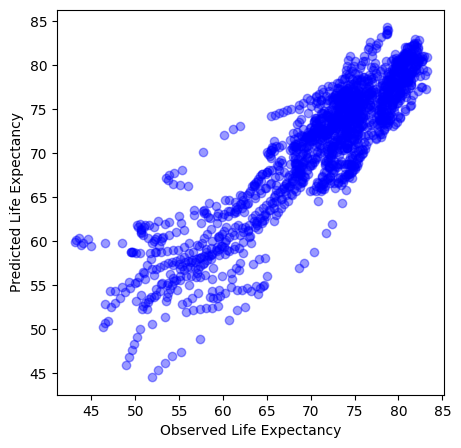

In [100]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.scatter(x = y_train, y = y_lr_train_pred, c="blue", alpha=0.4)

plt.plot()
plt.ylabel("Predicted Life Expectancy")
plt.xlabel("Observed Life Expectancy")

### *Data Visualization of Life Expectancy*

The figure below represents the frequency of all life-expectancy values in the world. From the distribution below, we can determine that the highest frequency for life expectancy is roughly 72 years. It also seems that the lowest life expectancy is about 40 years while the highest life expectancy is about 83 years.

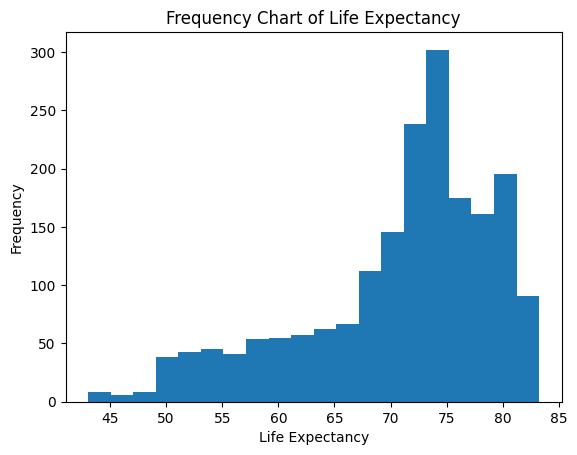

In [101]:
plt.hist(df["Life Expectancy"], bins = 20)
plt.ylabel("Frequency")
plt.xlabel("Life Expectancy")
plt.title("Frequency Chart of Life Expectancy")
plt.show()

The table below calculates the mean, minimum and maximum life expectancy globally. The output below depicts that our initial observations from the figure about the range and concentration of life expectancy is fairly accurate.

In [102]:
average_value = sum(df["Life Expectancy"]) / len(df["Life Expectancy"])
min_value = min(df["Life Expectancy"])
max_value = max(df["Life Expectancy"])

print(f"Average Life Expectancy: {average_value} \nMinimum Life Expectancy: {min_value} \nMaximum Life Expectancy: {max_value}")

Average Life Expectancy: 70.81734348738459 
Minimum Life Expectancy: 43.065 
Maximum Life Expectancy: 83.22926829


### ***What are some factors that can affect an individual's life expectancy?***

#### *1) Does the continent on which someone resides affect the resident's life expectancy?*

The scatter plot below represents the life-expectancy range of each of the different continents. It reveals that Oceania has the best life-expectancy of about 78-83 years whereas Africa has the worst life-expectancy of about 40-76 years in the world. 

Text(0.5, 0, 'Continents')

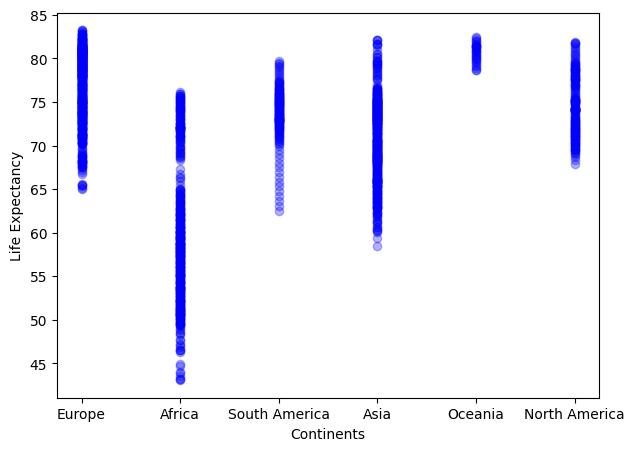

In [103]:
""" Use the numerical values in df["Continent"] to get the original names of the continents """
cont_temp_lst = []
for i in df["Continent"]:
    for key, value in cont_dict.items():
        if i == value:
            cont_temp_lst.append(key)


""" Plot the continents and their life expectancy range over """
plt.figure(figsize=(7, 5))
plt.scatter(x = cont_temp_lst, y = df["Life Expectancy"], c="blue", alpha = 0.3)

plt.plot()
plt.ylabel("Life Expectancy")
plt.xlabel("Continents")

A further calculation displayed in the table below helps us determine which continent has the best average life-expectancy. From the data below, we can see that Africa has the lowest average life expectancy whereas Oceania has the highest life expectancy.

In [104]:
expectancy_means = df["Life Expectancy"].groupby(df["Continent"])
print(f"Using the categorization: 0 -> Africa, 1 -> Europe, 2 -> Oceania, 3 -> North America, 4 -> South America, 5 -> Asia")
print("The mean of life expectancy for each continent is listed below:")
expectancy_means.mean()

Using the categorization: 0 -> Africa, 1 -> Europe, 2 -> Oceania, 3 -> North America, 4 -> South America, 5 -> Asia
The mean of life expectancy for each continent is listed below:


Continent
0    59.718445
1    76.707971
2    80.660694
3    74.496607
4    73.635850
5    70.770065
Name: Life Expectancy, dtype: float64

#### *2) Is the country developed or underdeveloped?*

The histograms below represents the life expectancy which is based on whether or not a country is developed or underdeveloped. From these graphs, we can infer that the average life expectancy for developed countries is higher than the average life expectancy for underdeveloped countries. The maximum life expectancy in developed countries is also higher than the maximum life expentancy in underdeveloped countries.

Text(0.5, 0.98, "Frequency Charts for Life Expectancy Based on a Country's Development (Blue) or Underdevelopment (Orange)")

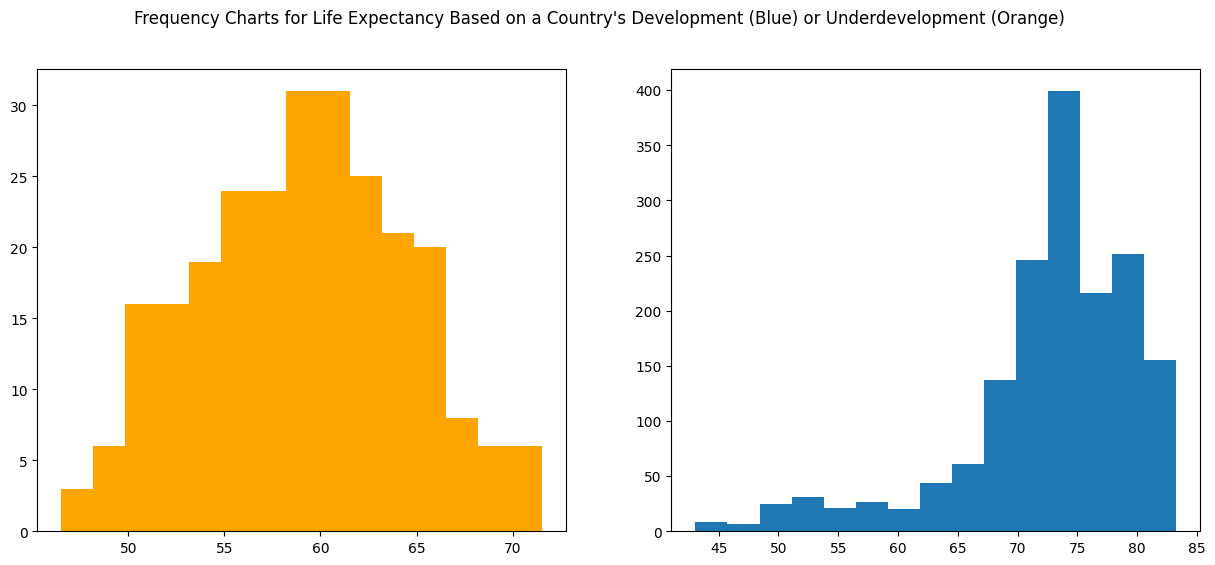

In [105]:
fig, plots = plt.subplots(1, 2, figsize=(15, 6))

dev_frequency = df["Life Expectancy"].groupby(df["Least Developed"]).get_group(1)
plots[0].hist(dev_frequency, bins=15, color="orange")

dev_frequency = df["Life Expectancy"].groupby(df["Least Developed"]).get_group(0)
plots[1].hist(dev_frequency, bins=15)

fig.suptitle("Frequency Charts for Life Expectancy Based on a Country's Development (Blue) or Underdevelopment (Orange)")


The data below confirms the information derived from the graph by yielding a mean and median life expectancy value of 72.64 and 73.91 for developed countries and 59.08 and 59.32 for underdeveloped countries respectively.

In [106]:
life_dev_data = df["Life Expectancy"].groupby(df["Least Developed"])
print(f"Using the categorization: 0 -> Developed, 1 -> Underdeveloped \n")
print("The mean life expectancy for developed and underdeveloped countries is listed below:")
print(life_dev_data.mean())
print()
print("The median life expectancy for developed and underdeveloped countries is listed below:")
print(life_dev_data.median())

Using the categorization: 0 -> Developed, 1 -> Underdeveloped 

The mean life expectancy for developed and underdeveloped countries is listed below:
Least Developed
0    72.640380
1    59.081543
Name: Life Expectancy, dtype: float64

The median life expectancy for developed and underdeveloped countries is listed below:
Least Developed
0    73.909817
1    59.319500
Name: Life Expectancy, dtype: float64


#### *3) Does the population of a region affect its residents' life expectancy?*

The graphs below represent the relationship between a country's population and its life expectancy. The graphs for all three countries, India, Ghana and Canada show that as the population of a country goes up, so does its life expectancy.

Text(0.5, 0.98, 'Life Expectancy vs Population Graphs')

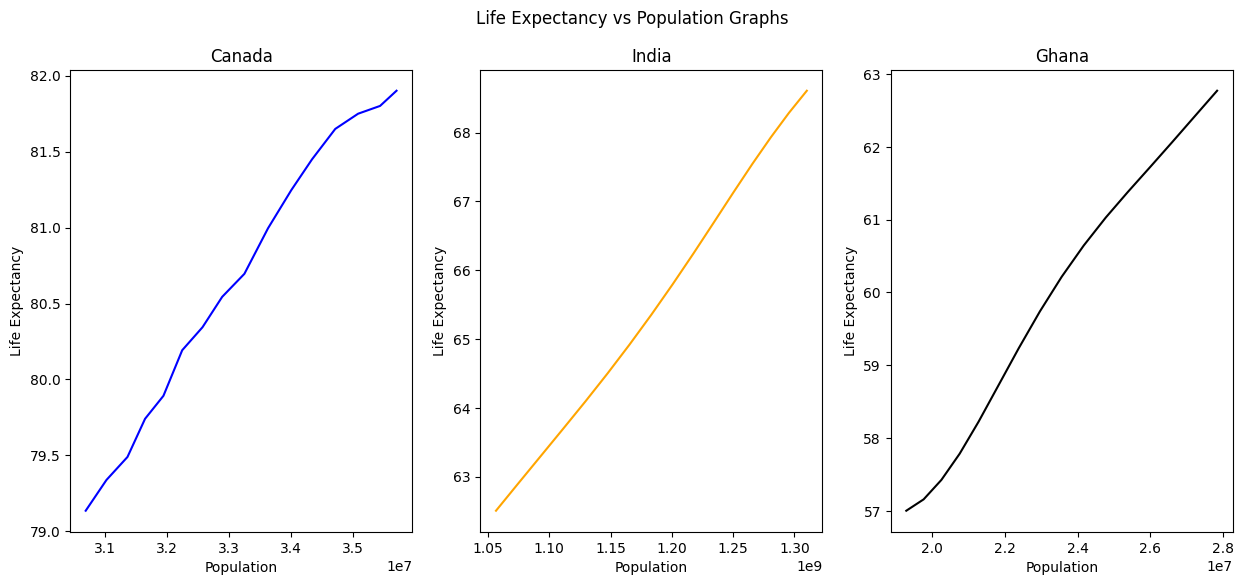

In [107]:
canada = df[["Population", "Life Expectancy"]].groupby(df["Country"]).get_group("Canada")
india = df[["Population", "Life Expectancy"]].groupby(df["Country"]).get_group("India")
ghana = df[["Population", "Life Expectancy"]].groupby(df["Country"]).get_group("Ghana")

fig, plots = plt.subplots(1, 3, figsize=(15, 6))

plots[0].plot(canada["Population"], canada["Life Expectancy"], color = "blue")
plots[0].set_title("Canada")
plots[0].set_xlabel("Population")
plots[0].set_ylabel("Life Expectancy")

plots[1].plot(india["Population"], india["Life Expectancy"], color = "orange")
plots[1].set_title("India")
plots[1].set_xlabel("Population")
plots[1].set_ylabel("Life Expectancy")

plots[2].plot(ghana["Population"], ghana["Life Expectancy"], color = "black")
plots[2].set_title("Ghana")
plots[2].set_xlabel("Population")
plots[2].set_ylabel("Life Expectancy")

fig.suptitle("Life Expectancy vs Population Graphs")

#### *4) How do unhygienic standards like people practicing open defecation affect life expectancy?*

The line plot below depicts the relationship between the number of people openly defecating in a country  and the life expectancy in that country. A quick glance at the graphs reveal that as the number of people openly defecating in a country increaase, the life expectancy of its citizens' decrease. In case of Canada, no pattern is observed as there are no people openly defecating in the country.

Text(0.5, 0.98, 'Life Expectancy vs Open Defecation')

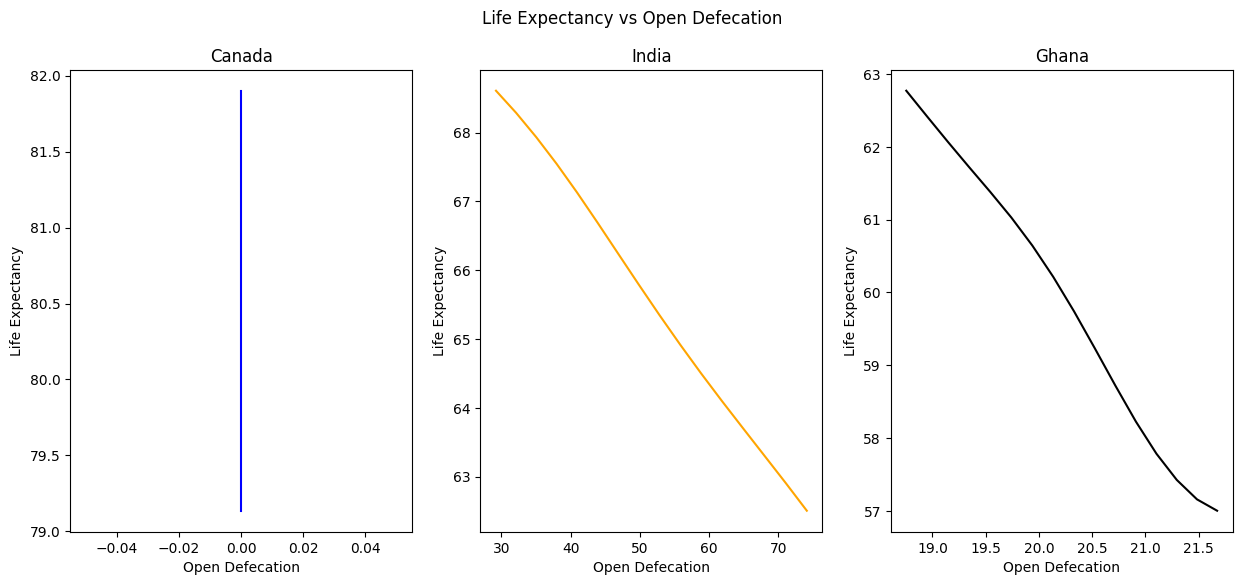

In [108]:
canada = df[["People practicing open defecation", "Life Expectancy"]].groupby(df["Country"]).get_group("Canada")
india = df[["People practicing open defecation", "Life Expectancy"]].groupby(df["Country"]).get_group("India")
ghana = df[["People practicing open defecation", "Life Expectancy"]].groupby(df["Country"]).get_group("Ghana")

fig, plots = plt.subplots(1, 3, figsize=(15, 6))

plots[0].plot(canada["People practicing open defecation"], canada["Life Expectancy"], color = "blue")
plots[0].set_title("Canada")
plots[0].set_xlabel("Open Defecation")
plots[0].set_ylabel("Life Expectancy")

plots[1].plot(india["People practicing open defecation"], india["Life Expectancy"], color = "orange")
plots[1].set_title("India")
plots[1].set_xlabel("Open Defecation")
plots[1].set_ylabel("Life Expectancy")

plots[2].plot(ghana["People practicing open defecation"], ghana["Life Expectancy"], color = "black")
plots[2].set_title("Ghana")
plots[2].set_xlabel("Open Defecation")
plots[2].set_ylabel("Life Expectancy")

fig.suptitle("Life Expectancy vs Open Defecation")

## ***Discussion***

In this assignment, I explored data about life-expectancy and what factors can affect it. I explored key relationships between unhygienic standards, the population, the development and the geolocation of a country and its life expectancy. An exploratory analysis supported the hypothesis that life expectancy is directly proportional to the development of a country and its population and it is inversely proportional to unhygienic standards such as open defecation. We also deduced that the continent a country is on affects the life expectancy of its residents. For example, in section 1) the graph revealed that Oceania had the highest life expectancy and Africa had the lowest one. It also revealed that both North America and Europe had generally higher life expectancy when compared to other continents like South America and Asia. In section 2), we discovered that the development of a country affected the life expectancy of its citzens. An interesting observation here was that there were some developed countries that had lower life expectancy than some of the underdeveloped countries but they were classified as outliers due to the low count of these countries and the major left skew on the histogram. For sections 3 and 4), we picked three countries, where each one of them differed from another on a vast variety of factors. This was inteded to make the data less biased and generalize any findings. In these sections, we established that as the population for each country went up, so did that country's life expectancy. However, this does ***not*** mean that a country with a higher population than another country will have better life expectancy. This can be seen from the graphs below. For instance, while India has a greater population than Canada, Canada still has better life expectancy. We also establised that an increase in open defecation in a country decreased that country's life expectancy. This is likely because countries where there are high numbers of people openly defecating have lower health standards or basic necessities, resulting in lower life expectancy for the people of these countries. 